<a href="https://colab.research.google.com/github/mayankraj25/SciKit-Learn/blob/main/Countries_clusterr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "countries of the world.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fernandol/countries-of-the-world",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)
df = df.replace(',', '.', regex=True)#This removes the commas from between the numbers
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,NaN,NaN,NaN


In [25]:
df['Region'].nunique()

11

In [63]:
df.columns = df.columns.str.strip()
df=df.drop(columns=["Country","Region"],axis=1)
df = df.apply(pd.to_numeric, errors='coerce')
'''This line tries to convert all columns in the DataFrame df to numeric values (like int or float), and:
	•	If a value cannot be converted (e.g., it’s a string like "hello" or "N/A"), it is replaced with NaN (missing value).'''
df.fillna(df.mean())
print(X.isnull().sum())

Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [65]:
wcss=[]
for i in range(1,20):
    model=KMeans(n_clusters=i,random_state=42)
    wcss.append(model.fit(X).inertia_)
wcss

[4086.000000000001,
 3240.5801051277185,
 2963.2263567608165,
 2612.0171389601383,
 2435.836362247268,
 2285.182386434685,
 2049.6530302228384,
 1860.572748005713,
 1718.4698189292253,
 1647.7515308453849,
 1574.6271953466803,
 1469.5673949274503,
 1417.876873208994,
 1399.7698226762932,
 1336.3122316098438,
 1307.1704029109344,
 1285.986856269162,
 1234.1461196714918,
 1147.0341240160747]

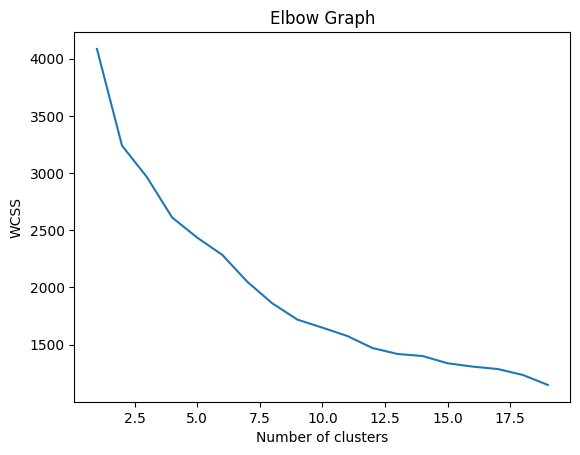

In [66]:
plt.plot(range(1,20),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

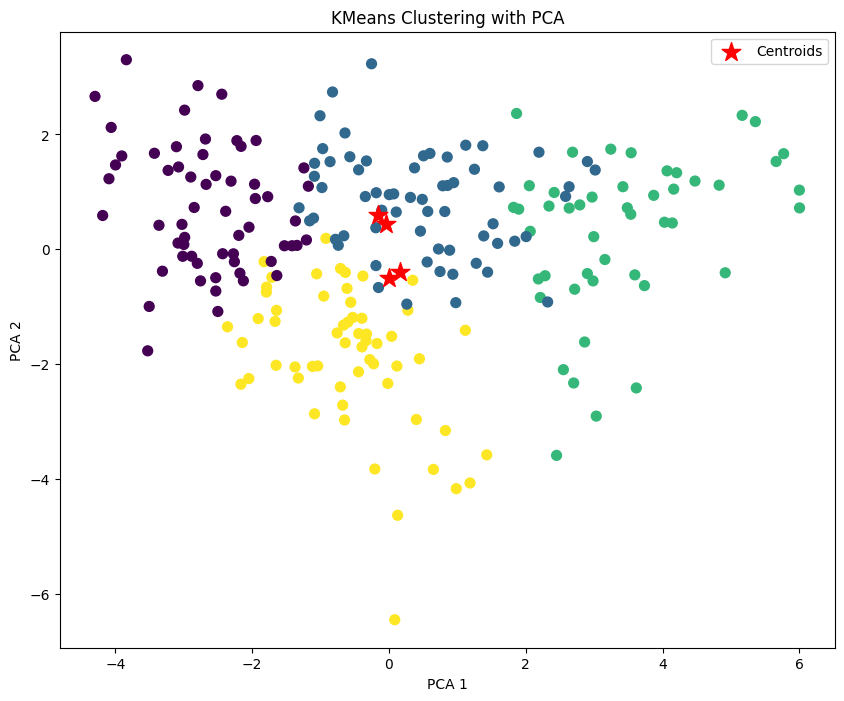

In [77]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='*', label='Centroids')
plt.title('KMeans Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()